<h3>Projekt: Lineární regrese</h3>

<h3>1. Načtení datasetu z Kaggle</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import datasetu do pandas DataFrame
df=pd.read_csv("Housing.csv")

In [2]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Získání relevantních sloupců
sizes=df["area"]*0.093
prices=df["price"]

# Vytvoření Dataframe s upravenými sloupcemi
df=pd.DataFrame({"size_m2":sizes, "price($)":prices})

In [44]:
df.head()

,size_m2,price($)
0,690.06,13300000
1,833.28,12250000
2,926.28,12250000
3,697.50,12215000
4,690.06,11410000


In [ ]:
df.describe()

,size_m2,price($)
count,545.000000,5.450000e+02
mean,479.000339,4.766729e+06
std,201.823115,1.870440e+06
min,153.450000,1.750000e+06
25%,334.800000,3.430000e+06
50%,427.800000,4.340000e+06
75%,591.480000,5.740000e+06
max,1506.600000,1.330000e+07


In [ ]:
# Rozdělení na trénovací a testovací data. 20 % dat bude použito pro testování a 80 % pro trénování. Vstupní proměnnou (feature) je velikost bytu v metrech čtverečních. Cílovou proměnnou (target) je cena bytu.
# X_train – vstupy pro trénování,
# X_test – vstupy pro testování, 
# y_train – výstupy (cílové hodnoty) pro trénování,
# y_test – výstupy pro testování.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df[["size_m2"]],df["price($)"], test_size=0.2)

<h3>2. Vizualizace dat:</h3>



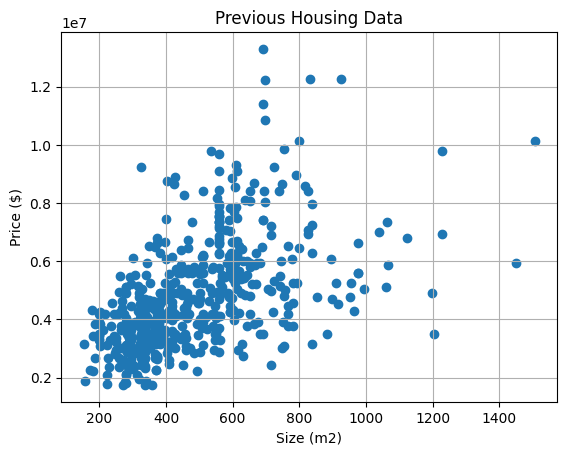

In [47]:
plt.scatter(df["size_m2"], df["price($)"])
plt.title('Previous Housing Data')
plt.xlabel('Size (m2)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

<h3>3. Natrénování modelu:</h3>


In [48]:
from sklearn.linear_model import LinearRegression

# Vytváří instanci modelu
model=LinearRegression()

# Trénuje model pomocí vstupních dat X_train a výstupních hodnot y_train
model.fit(X_train, y_train)

LinearRegression()

<h3>4. Predikce </h3>


In [49]:
from sklearn.metrics import mean_absolute_error, r2_score

# Použije natrénovaný model, aby předpověděl hodnoty cílové proměnné pro testovací data (X_test)

y_pred=model.predict(X_test)

<h3>5. Vizualizace modelu</h3>

c:\Users\patrik\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


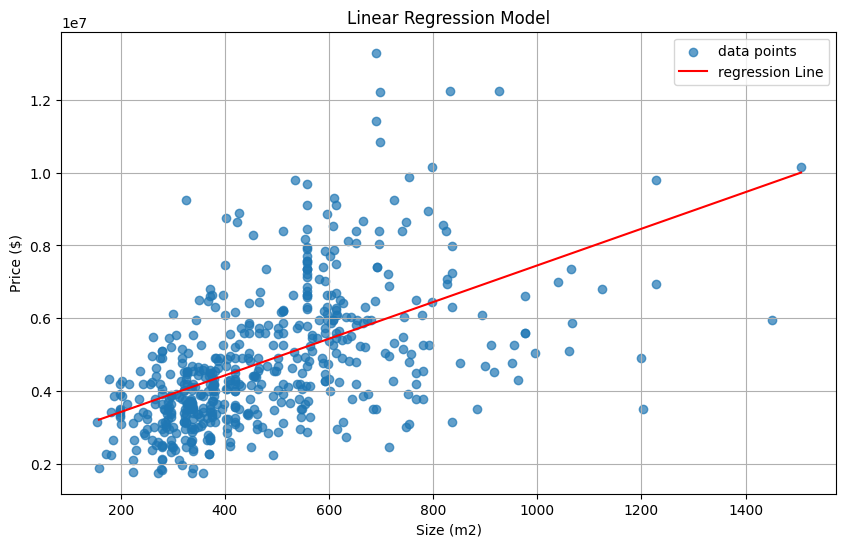

In [50]:
plt.figure(figsize=(10,6))

# Bodový graf skutečných dat
plt.scatter(df[["size_m2"]], df[["price($)"]], alpha=0.7, label="data points")

# Vykreslení regresní přímky
size_for_line=np.linspace(X_test["size_m2"].min(), X_test["size_m2"].max(), 100)
predicted_prices_for_line=model.predict(size_for_line.reshape(-1,1))
plt.plot(size_for_line, predicted_prices_for_line, color="red", label="regression Line")

# Přidání popisků, legendy a názvu
plt.title('Linear Regression Model')
plt.xlabel('Size (m2)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

<h3>6. Vyhodnocení modelu</h3>

In [51]:
# Výpočet metrik + koeficientu
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

# Vypsání metrik
print(f"coefficient (slope): {model.coef_[0]:.2f}")
print(f"MAE:{mae}")
print(f"r2: {r2}")

coefficient (slope): 5039.77
MAE:1041410.8050600172
r2: 0.38589123256528635


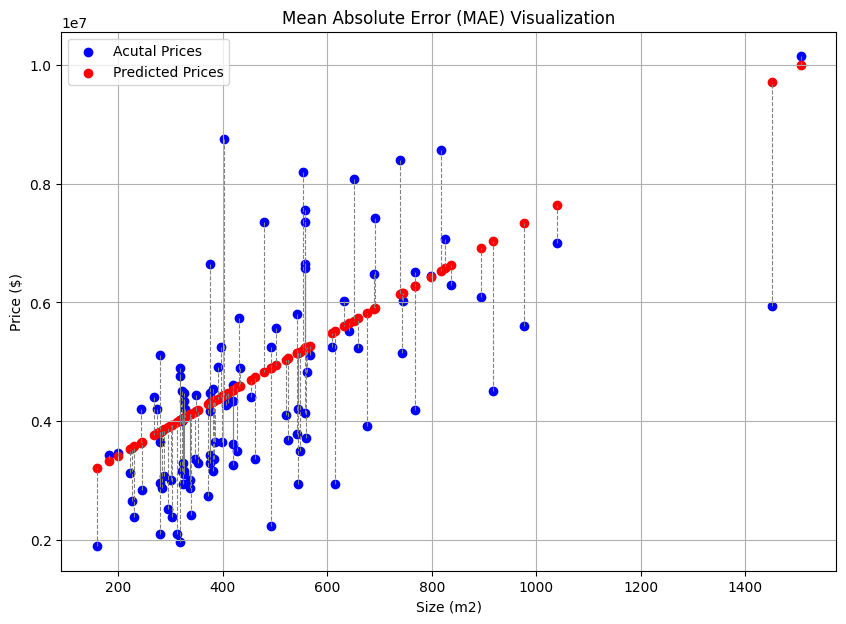

In [52]:
plt.figure(figsize=(10,7))

plt.scatter(X_test['size_m2'], y_test, color='blue', label='Acutal Prices')
plt.scatter(X_test['size_m2'], y_pred, color='red', label='Predicted Prices')

for i in range(len(y_test)):
    plt.plot([X_test.iloc[i]['size_m2'], X_test.iloc[i]['size_m2']], [y_test.iloc[i], y_pred[i]], color='gray', linestyle='--', linewidth=0.8)

plt.title('Mean Absolute Error (MAE) Visualization')
plt.xlabel('Size (m2)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
print(f"MAE: {mae:0f}, R2: {r2:.2f}")

MAE: 1041410.805060, R2: 0.39
